## Customer Churn Prediction Using ANN

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
## importing the dataset

dataset = pd.read_csv('Churn_Modelling.csv')


In [62]:
X = dataset.iloc[:,3:13].values  ## as 1st 3 columns are not significant in predicting if customer will exit , so drop them
y = dataset.iloc[:,13].values   ## exited column

In [63]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [65]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


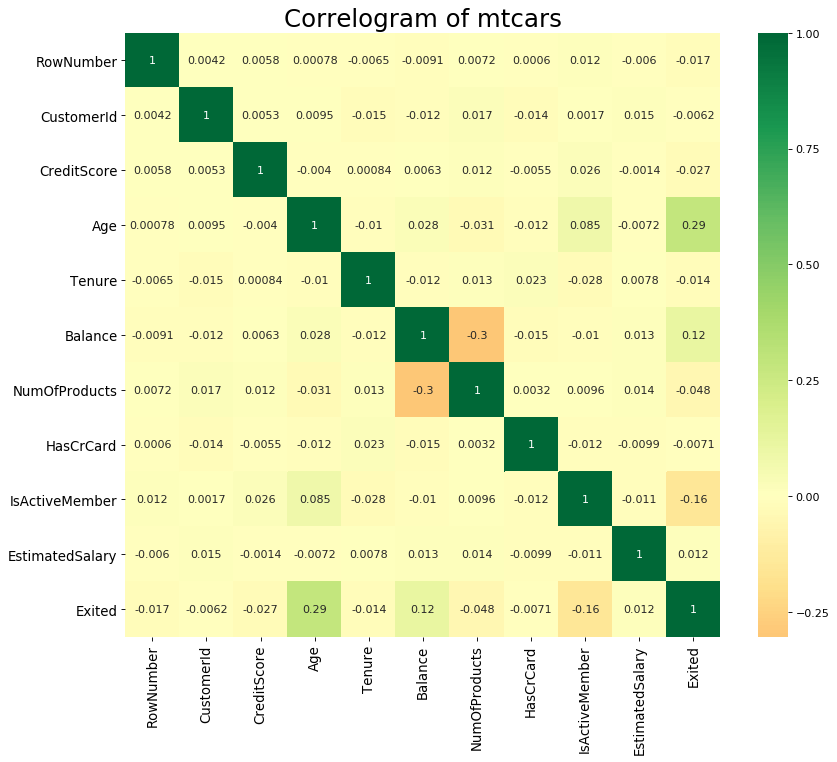

In [69]:
plt.figure(figsize=(12,10), dpi= 80)

sns.heatmap(dataset.corr(), xticklabels=dataset.corr().columns, yticklabels=dataset.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gcf()

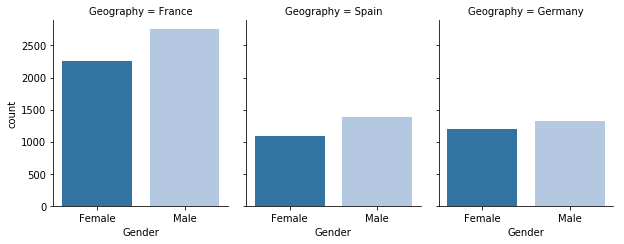

In [74]:

g = sns.catplot("Gender", col="Geography", col_wrap=4,
                data=dataset[dataset.Geography.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')
    
#plt.figure.suptitle('sf')
plt.gcf()

In [67]:
X = dataset.iloc[:,3:13].values ## as 1st 3 columns are not significant in predicting if customer will exit , so drop them
y = dataset.iloc[:,13].values   ## exited column

In [68]:

# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_country = LabelEncoder()     ## encoding country variable to integer
X[:, 1] = labelencoder_X_country.fit_transform(X[:, 1])

labelencoder_X_gender= LabelEncoder()     ## encoding gender variable to integer
X[:, 2] = labelencoder_X_gender.fit_transform(X[:, 2])


In [52]:

## for creating dummy variables for our country class as there are 3 countries
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()


C:\Users\dhruv\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\dhruv\Anaconda3\envs\tfdeeplearning\lib\site-packages\sklearn\preprocessing\_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [53]:

## now we can see that our country variable has been converted into dummy variables 
## now we could remove one column to avoid dummy variable trap
X = X[:,1:]   # all except 1'st column

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [54]:

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [56]:

## import libraries for our DL model
import keras
from keras.models import Sequential
from keras.layers import Dense


In [22]:
 
### our ANN build

## classifier is our ANN model
classifier = Sequential()
## our dependent layer has only 2 values 0 &1 so output layer dim = 11+1/2 = 6
 ## uniform is initializing random uniform number close to 0 as weight for our nodes
 ## selecting activation as relu
classifier.add(Dense(input_dim=11,output_dim=6,init='uniform',activation='relu',)) ## first hidden layer

classifier.add(Dense(output_dim=6,init='uniform',activation='relu',)) ## second hidden layer

classifier.add(Dense(output_dim=1,init='uniform',activation='sigmoid',)) ## output layer
 


C:\Users\dhruv\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="relu", input_dim=11, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\dhruv\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dhruv\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  del sys.path[0]


In [23]:
## generally we in  logistic we get log-loss as loss function
## binary_crossentropy for binary classification
## for more than 3 classification we would use categorical_crossentropy
## metrics set to reach max accuracy
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics =['accuracy'])


classifier.fit(X_train,y_train,batch_size=10,epochs=100)


Epoch 1/100
8000/8000 [==============================] - 4s 544us/step - loss: 0.4838 - acc: 0.7960
Epoch 2/100
8000/8000 [==============================] - 2s 299us/step - loss: 0.4287 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 2s 290us/step - loss: 0.4235 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 2s 301us/step - loss: 0.4199 - acc: 0.8171
Epoch 5/100
8000/8000 [==============================] - 3s 325us/step - loss: 0.4175 - acc: 0.8249
Epoch 6/100
8000/8000 [==============================] - 2s 295us/step - loss: 0.4161 - acc: 0.8286
Epoch 7/100
8000/8000 [==============================] - 2s 303us/step - loss: 0.4137 - acc: 0.8320
Epoch 8/100
8000/8000 [==============================] - 2s 291us/step - loss: 0.4122 - acc: 0.8309
Epoch 9/100
8000/8000 [==============================] - 2s 266us/step - loss: 0.4109 - acc: 0.8331
Epoch 10/100
8000/8000 [==============================] - 2s 264us/step - loss: 0.4101 - acc: 0.8340

8000/8000 [==============================] - 2s 238us/step - loss: 0.4003 - acc: 0.8354
Epoch 82/100
8000/8000 [==============================] - 2s 238us/step - loss: 0.4004 - acc: 0.8351
Epoch 83/100
8000/8000 [==============================] - 2s 238us/step - loss: 0.4005 - acc: 0.8345
Epoch 84/100
8000/8000 [==============================] - 2s 271us/step - loss: 0.4008 - acc: 0.8346
Epoch 85/100
8000/8000 [==============================] - 2s 241us/step - loss: 0.4004 - acc: 0.8349
Epoch 86/100
8000/8000 [==============================] - 2s 239us/step - loss: 0.4007 - acc: 0.8340
Epoch 87/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.4005 - acc: 0.8352
Epoch 88/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.4003 - acc: 0.8362
Epoch 89/100
8000/8000 [==============================] - 2s 239us/step - loss: 0.4005 - acc: 0.8350
Epoch 90/100
8000/8000 [==============================] - 2s 240us/step - loss: 0.4004 - acc: 0.8345
Epo

In [24]:
 
# Fitting classifier to the Training set
# Create your classifier here

# Predicting the Test set results
y_pred = classifier.predict(X_test)  ### this pred method will return probabilities
y_pred =(y_pred>0.5)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)



In [25]:
cm

array([[1534,   61],
       [ 254,  151]], dtype=int64)

In [31]:
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score


In [33]:
f1_score(y_test,y_pred)

0.4894651539708265

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1595
           1       0.71      0.37      0.49       405

   micro avg       0.84      0.84      0.84      2000
   macro avg       0.79      0.67      0.70      2000
weighted avg       0.83      0.84      0.82      2000

